# 1. Mô tả bộ dữ liệu
### Nguồn dữ liệu:
Bộ dữ liệu Palmer Penguins được công bố bởi Allison Horst, Kristen Gorman và cộng sự
### Mục tiêu bài toán:
Xây dựng mô hình phân loại loài chim cánh cụt (species) dựa trên các đặc trưng hình thái học như độ dài, độ rộng mỏ, chiều dài vây, và khối lượng cơ thể.
### Quy mô dữ liệu:
Bộ dữ liệu gồm 344 mẫu với 8 cột đặc trưng (bao gồm cả thuộc tính mục tiêu).
### Các thuộc tính chính:

| Thuộc tính        | Mô tả                                          | Kiểu dữ liệu |
| ----------------- | ---------------------------------------------- | ------------ |
| species           | Loài chim cánh cụt (Adelie, Chinstrap, Gentoo) | Categorical  |
| island            | Hòn đảo sinh sống (Biscoe, Dream, Torgersen)   | Categorical  |
| bill_length_mm    | Độ dài mỏ (mm)                                 | Numeric      |
| bill_depth_mm     | Độ sâu mỏ (mm)                                 | Numeric      |
| flipper_length_mm | Chiều dài vây (mm)                             | Numeric      |
| body_mass_g       | Khối lượng cơ thể (g)                          | Numeric      |
| sex               | Giới tính (Male/Female)                        | Categorical  |
| year              | Năm khảo sát                                   | Numeric      |
### Đặc điểm dữ liệu:

- Có chứa giá trị thiếu (NaN) ở một số cột (sex, bill_length_mm, ...).

- Các đặc trưng có thang đo khác nhau, nên cần chuẩn hóa trước khi huấn luyện.

- Biến mục tiêu (species) gồm 3 lớp → bài toán phân loại đa lớp.

### Chất lượng và xử lý dữ liệu:

- Loại bỏ hoặc điền giá trị thiếu.

- Mã hóa dữ liệu phân loại bằng LabelEncoder hoặc OneHotEncoder.

- Chia dữ liệu theo tỉ lệ hợp lý để đảm bảo tính tổng quát của mô hình.

### Ứng dụng và phạm vi sử dụng:

- Dạy học và minh họa thuật toán phân loại.

- Thử nghiệm các mô hình ML như Random Forest, SVM, hoặc XGBoost.

- Là ví dụ kinh điển để phân tích dữ liệu sinh học và bảo tồn động vật.

# 2. Quy trình chia dữ liệu và huấn luyện mô hình Random Forest

## 2.1 Tải và đọc dữ liệu

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv
dataset_df = pd.read_csv("/tmp/penguins.csv")

# Hiển thị vài dòng đầu
dataset_df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## 2.2 Kiểm tra thông tin và xử lý dữ liệu

In [2]:
print("Thông tin tổng quan:")
print(dataset_df.info())
print("\nSố giá trị thiếu:")
print(dataset_df.isnull().sum())

# Loại bỏ dòng có giá trị thiếu
dataset_df = dataset_df.dropna()

# Mã hóa cột phân loại
label_cols = ['species', 'island', 'sex']
for col in label_cols:
    le = LabelEncoder()
    dataset_df[col] = le.fit_transform(dataset_df[col])

dataset_df.head()


Thông tin tổng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None

Số giá trị thiếu:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


## 2.3 Chia dữ liệu

In [3]:
# Tách biến đầu vào (X) và đầu ra (y)
X = dataset_df.drop(columns=['species'])
y = dataset_df['species']

# Chia train/test với tỉ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Chuẩn hóa dữ liệu (nếu cần)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (233, 7)
Kích thước tập kiểm tra: (100, 7)


## 2.4 Huấn luyện mô hình Random Forest

In [4]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)


## 2.5 Đánh giá mô hình

Độ chính xác (Accuracy): 1.0

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Ma trận nhầm lẫn:


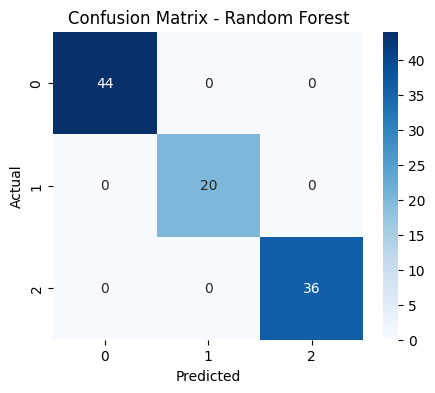

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred))
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

print("\nMa trận nhầm lẫn:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
